`## This is ai generated model for the Bessel's and Legendre's Equation.`

**`Solving Bessel's with Gemini and model is good in begin but losing it's trace in last as Bessel's is an osscillating graph and we haven't implemented a good bound for it's solution in the interval. This can be optimised by training for the small intervals as in samll intervals it will not osscillate and we would have a stable solution`**

*`Complex functions used so no need to dive in it will develop a good model further.`*

In [ ]:
# Now another experiment with the Gemini. First ever project with Gemini.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn

In [ ]:

# Define the Bessel's differential equation parameters
nu = 1  # Order of the Bessel function
a = 10  # Upper bound of the domain

# Generate training data
x_train = np.linspace(0.01, a, 1000)  # Avoid zero to prevent numerical issues
y_train_exact = np.zeros_like(x_train)
for i, x in enumerate(x_train):
    y_train_exact[i] = jn(nu, x)  # Calculate exact Bessel function


In [ ]:

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(x_train, y_train_exact, epochs=100, batch_size=32, validation_split=0.2)

# Predict the solution
x_test = np.linspace(0.01, a, 100)
y_pred = model.predict(x_test)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1956 - val_loss: 0.0871
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0849 - val_loss: 0.0868
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0661 - val_loss: 0.1138
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0582 - val_loss: 0.3682
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0548 - val_loss: 0.4119
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0559 - val_loss: 0.2597
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0557 - val_loss: 0.3692
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0576 - val_loss: 0.5017
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0554 - val_loss: 0.4308
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0521 - val_loss: 0.7658
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0547 - val_loss: 0.4559
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0519 - val_l

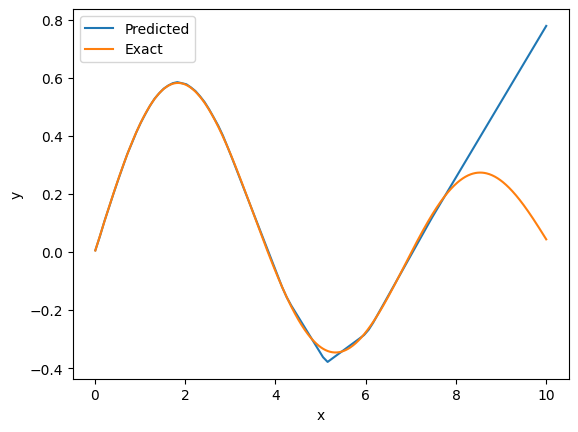

In [ ]:

# Plot the results
plt.plot(x_test, y_pred, label='Predicted')
plt.plot(x_train, y_train_exact, label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
